In [17]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
vocab_size = 10000
maxlen = 200

In [19]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [20]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [21]:
X_train.shape

(25000, 200)

In [23]:
rnn = Sequential(
    [
        Embedding(vocab_size, 128, input_length = maxlen),
        SimpleRNN(128),
        Dense(1, activation='sigmoid')
    ]
)
rnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
lstm = Sequential(
    [
        Embedding(vocab_size, 128, input_length = maxlen),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ]
)
lstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/home/petpooja-1009/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [25]:
gru = Sequential(
    [
        Embedding(vocab_size, 128, input_length = maxlen),
        GRU(128),     
        Dense(1, activation='sigmoid')
    ]
)
gru.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/home/petpooja-1009/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
models = {'RNN': rnn, 'LSTM': lstm, 'GRU': gru}

In [35]:
history = {}

for name, model in models.items():
    print(f"\nTraining **{name} Model**...")
    hist = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.2,
        verbose=1
    )
    history[name] = hist


Training **RNN Model**...
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.8777 - loss: 0.2949 - val_accuracy: 0.7232 - val_loss: 0.6692
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9100 - loss: 0.2310 - val_accuracy: 0.7702 - val_loss: 0.6145
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9453 - loss: 0.1645 - val_accuracy: 0.7820 - val_loss: 0.6341
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9579 - loss: 0.1322 - val_accuracy: 0.7820 - val_loss: 0.6674
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9677 - loss: 0.1078 - val_accuracy: 0.7812 - val_loss: 0.7021

Training **LSTM Model**...
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 301ms/step - accuracy: 0.7770 - loss: 0.4493 - val_accuracy: 0.8696 - val_loss: 0.3157
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 295ms/step - accuracy: 0.9014 - loss: 0.2505 - val_accuracy: 0.8716 - val_loss: 0.3043
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4

In [36]:
results = {}

for name, model in models.items():
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

RNN Accuracy: 0.7792
LSTM Accuracy: 0.8374
GRU Accuracy: 0.8469


In [42]:
best_model = max(results, key=results.get)

print("Model Comparison:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")
    
print(f"Best Model: {best_model} with accuracy = {results[best_model]:.4f}")

Model Comparison:
RNN: 0.7792
LSTM: 0.8374
GRU: 0.8469
Best Model: GRU with accuracy = 0.8469


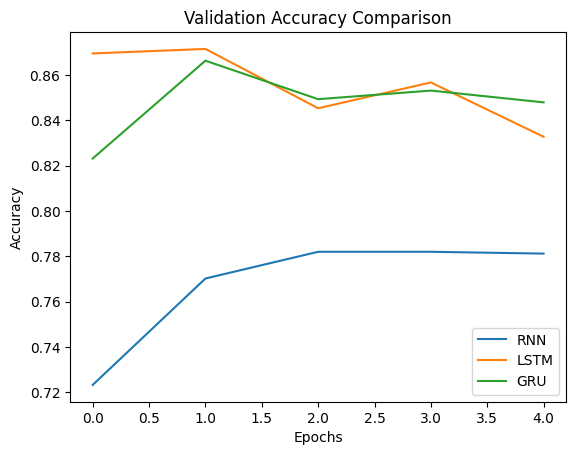

In [38]:
for name in history:
    plt.plot(history[name].history["val_accuracy"], label=f"{name}")
    
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()